# K-means ++

## Liberías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Funciones

### Normalización

In [2]:
def normalizar(datos_):
    maximos_ = np.max(datos_, axis = 0)
    minimos_ = np.min(datos_, axis = 0)
    datos_normalizados_ = (datos_ - minimos_) / (maximos_ - minimos_)
    return datos_normalizados_

### Separacionde datos de entrenamiento y de prueba

In [3]:
def datos_entrenamiento_prueba(datos_, etiquetas_, tamaño_entrenamiento_ = 0.8):
    indices_aleatorios_ = np.arange(len(datos_))
    random.shuffle(indices_aleatorios_)
    i_final_entrenamiento_ = int(len(datos_) * tamaño_entrenamiento_)
    i_entrenamiento_ = indices_aleatorios_[0:i_final_entrenamiento_]
    i_prueba_ = indices_aleatorios_[i_final_entrenamiento_:]
    x_entrenamiento_ = datos_[i_entrenamiento_,:]
    x_prueba_ = datos_[i_prueba_,:]
    y_entrenamiento_ = etiquetas_[i_entrenamiento_]
    y_prueba_ = etiquetas_[i_prueba_]
    return x_entrenamiento_, x_prueba_, y_entrenamiento_, y_prueba_

### Inicialización de centroides

#### Por K-means

In [4]:
def inicializacion_centroides(num_centroides_, atributos_):
    centroides_ = np.random.rand(num_centroides_, atributos_)
    return centroides_

#### Por K-means ++

In [5]:
def centroidespp(datos_, k):
    aleatorio = np.random.randint(0, len(datos_))
    centroides = np.zeros((k, datos_.shape[1]))
    centroides[0] = datos_[aleatorio]
    for i in range(k-1):
        centroide = np.expand_dims(centroides[i], 0)
        distancias_ = calculo_distancias(datos_, centroide)
        punto_lejano = np.max(distancias_)
        posicion_ = np.where(distancias_ == punto_lejano)
        centroides[i+1] = datos_[posicion_[0]]
    return centroides

### Distancia euclidiana

In [6]:
def distancia_euclidiana(punto_, centroide_):
    for p_, c_ in zip(punto_, centroide_):
        suma_cuadrados_ = (p_ - c_) ** 2
    de_ = np.sqrt(suma_cuadrados_)
    return de_

### Calculo de distancias

In [7]:
def calculo_distancias(datos_, centroides_):
    distancias_ = np.zeros((len(datos_), len(centroides_)))
    for i in range(len(centroides_)):
        for j in range((len(datos_))):
            distancias_[j, i] = distancia_euclidiana(datos_[j,:], centroides_[i,:])
    return distancias_   

### Selección de centroide

In [8]:
def seleccion_centroide(distancias_):
    grupo_perteneciente_ = np.zeros((len(distancias_), 1))
    minimos = np.min(distancias_, axis = 1)
    for i in range(len(distancias_)):
        cluster = np.where(distancias_[i, :] == minimos[i])
        grupo_perteneciente_[i, 0] = int(cluster[0])
    return grupo_perteneciente_

### Actualización de centroides

In [9]:
def actualizar_centroides(datos, grupo_, centroides_):
    for i in range(len(centroides_)):
        indices_ = np.where(grupo_ == i)
        indices_ = np.asarray(indices_[0])
        centroides_[i, :] = np.mean(datos[indices_, :], axis = 0)
    return centroides_

### Calculo de precision

In [10]:
def precision(etiquetas_, asignacion_, k_):
  k_ = 3
  coincidencias_ = np.zeros((k_, k_))

  for i in range(k_):
    clase_ = np.where(etiquetas_ == i)
    grupo_asignado_ = asignacion_[clase_[0],0]
    for j in range(k_):
      contador = 0
      for l in range(len(grupo_asignado_)):
        if grupo_asignado_[l] == j:
          contador +=1
      coincidencias_[i, j] = contador

  precision_grupo = np.max(coincidencias_, axis = 1) / np.sum(coincidencias_, 1)
  return coincidencias_, precision_grupo

### Graficación de grupos

In [11]:
def plot(datos_, grupos_, k_):
  colores = ['blue', 'red', 'orange', 'purple', 'green']
  marcadores = ['+', '^', '*', '.']
  plt.figure(1)
  for i in range(k_):
    grupo_ = np.where(grupos_ == i)
    grupo_asignado_ = datos_[grupo_[0]]

    plt.scatter(grupo_asignado_[:, 0], grupo_asignado_[:, 1],
                marker = marcadores[i],
                color = colores[i], label = f'Grupo {i}')
    plt.title('Agrupación final')
     
    plt.legend()
    plt.xlim(0, 1.1)
    plt.ylim(0, 1.1)
  plt.show

## Base de datos

In [12]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, (0, 1, 2)]
y = iris.target

## Normalización y separacion de datos entre entrenamiento y prueba

In [13]:
x_norm = normalizar(X)
x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = datos_entrenamiento_prueba(x_norm, y)

## Entrenamiento

In [14]:
num_iteraciones = 1000
cambio_centroides = 0

In [15]:
centroides = centroidespp(x_entrenamiento, 3)

for i in range(num_iteraciones):
    distancia_hacia_centroides = calculo_distancias(x_entrenamiento, centroides)
    y_pred_entrenamiento = seleccion_centroide(distancia_hacia_centroides)
    centroides_pasados = np.copy(centroides)
    centroides = actualizar_centroides(x_entrenamiento, y_pred_entrenamiento,
                                       centroides)
    if np.array_equal(centroides_pasados, centroides):
        cambio_centroides += 1
    if cambio_centroides == 3:
        break

## Prueba

In [16]:
distancias_prueba = calculo_distancias(x_prueba, centroides)
y_prueba_KM = seleccion_centroide(distancias_prueba)

## Resultados

### Entrenamiento

In [17]:
Matriz_conf_KM, precision_xg_KM = precision(y_entrenamiento, y_pred_entrenamiento, 3)
Matriz_conf_KM

array([[ 0., 38.,  0.],
       [43.,  0.,  0.],
       [12.,  0., 27.]])

In [18]:
precision_xg_KM

array([1.        , 1.        , 0.69230769])

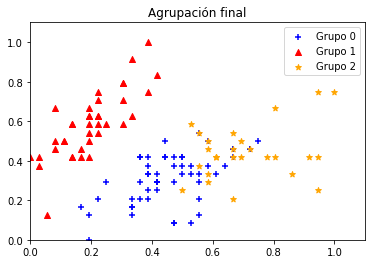

In [19]:
plot(x_entrenamiento, y_pred_entrenamiento, 3)

### Prueba

In [39]:
Matriz_conf_prueba_KM, precision_xg_prueba_KM = precision(y_prueba, y_prueba_KM, 3)
Matriz_conf_prueba_KM

array([[ 0., 12.,  0.],
       [ 7.,  0.,  0.],
       [ 4.,  0.,  7.]])

In [21]:
precision_xg_prueba_KM

array([1.        , 1.        , 0.69230769])

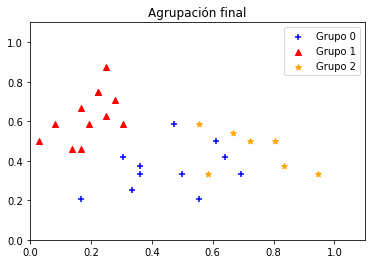

In [22]:
plot(x_prueba, y_prueba_KM, 3)

# EM-Clustering

## Librerías

In [23]:
import numpy as np
import random
from numpy.linalg import det as determinante
from numpy.linalg import inv as inversa

## Funciones

Las funciones de Normalización y separacion de datos entre entrenamiento y prueba son las mismas que se implementaron en K-means ++

### PDF de Distribución Normal

In [24]:
def normal_multivariante(x_, cov_, media_):
    p1_ = (2*np.pi)**(-len(x_)/2) * determinante(cov_)**(-1/2)
    p2_ = np.exp(-1/2 * (x_ - media_).T @ inversa(cov_) @ (x_ - media_))
    funcion_densidad = p1_ * p2_
    return funcion_densidad

### Paso de Ezperanza

In [25]:
def paso_E(datos_, grupos_, pi_, medias_, covarianzas_):
    r_ = np.zeros((len(datos_), grupos_))
    for i in range(len(datos_)):
        for j in range(3):
            numerador_ = pi_[j] * normal_multivariante(datos_[i],
                                                      covarianzas_[j],
                                                      medias_[j])
            denominador_ = 0
            for k in range(3):
                denominador_ += pi_[k]* normal_multivariante(datos_[i],
                                                             covarianzas_[k],
                                                             medias_[k])
            r_[i, j] = numerador_ / denominador_
    N_ = np.sum(r_, axis = 0)
    return r_, N_
    

### Paso de maximización

In [26]:
def paso_M(datosm_, gruposm_, rm_, Nm_, pim_):
    mediasm_ = np.zeros((gruposm_, datosm_.shape[1]))
    for i in range(gruposm_):
        for j in range(len(datosm_)):
            mediasm_[i] += rm_[j, i] * datosm_[j]
    for i in range(gruposm_):
        mediasm_[i] = 1 / Nm_[i] * mediasm_[i]
    covarianzasm_ = np.zeros((gruposm_, datosm_.shape[1],
                            datosm_.shape[1]))
    for i in range(gruposm_):
        covarianzasm_[i] = np.cov(datosm_.T, aweights=(rm_[:, i]), ddof=0)
    for i in range(gruposm_):
        covarianzasm_[i] = 1 / Nm_[i] * covarianzasm_[i]
    for i in range(gruposm_):
        pim_[i] = Nm_[i] / len(datosm_)
    return mediasm_, covarianzasm_, pim_

## Base de datos. Normalización y separación de datos.

La base de datos es la misma que se ocupa para K-means por lo cual ejecutando las celdas correspondientes a **Base de datos** y **Normalización y separación de base de datos entre entrenamiento y prueba** es suficiente. En caso que ya se haya corrido no es necesario volver a correr.

## Entrenamiento

In [47]:
numero_grupos = 3
num_iteraciones = 3000
pi = np.ones(numero_grupos) / numero_grupos

In [53]:
x_temp = np.array_split(x_entrenamiento, numero_grupos)
medias = np.zeros((numero_grupos, x_entrenamiento.shape[1]))
covarianzas = np.zeros((numero_grupos, x_entrenamiento.shape[1],
                        x_entrenamiento.shape[1]))

for i in range(numero_grupos):
    medias[i] = np.mean(x_temp[i], axis = 0)
    covarianzas[i] = np.cov(x_temp[i].T)
del x_temp
for i in range(num_iteraciones):
    r, N = paso_E(x_entrenamiento, numero_grupos, pi, medias, covarianzas)
    medias, covarianzas, pi = paso_M(x_entrenamiento, numero_grupos, r, N, pi)

y_pred_entrenamiento_EM = np.zeros((len(r), 1))
maximos = np.max(r, axis = 1)
for i in range(len(r)):
    grupo = np.where(r[i, :] == maximos[i])
    y_pred_entrenamiento_EM[i, 0] = int(grupo[0])



## Prueba

In [54]:
p, N = paso_E(x_prueba, 3, pi, medias, covarianzas)

y_prueba_EM = np.zeros((len(p), 1))
maximos = np.max(p, axis = 1)
for i in range(len(p)):
    grupo = np.where(p[i, :] == maximos[i])
    y_prueba_EM[i, 0] = int(grupo[0])

## Resultados

In [57]:
Matriz_conf_EM, precision_xg_EM = precision(y_entrenamiento, y_pred_entrenamiento_EM, 3)
Matriz_conf_EM

array([[38.,  0.,  0.],
       [ 0., 19., 24.],
       [ 0., 25., 14.]])

In [58]:
precision_xg_EM

array([1.        , 0.55813953, 0.64102564])

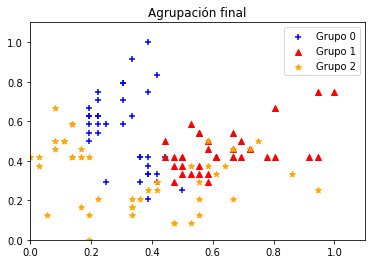

In [32]:
plot(x_entrenamiento, y_pred_entrenamiento_EM, 3)

In [55]:
Matriz_conf_prueba_EM, precision_xg_prueba_EM = precision(y_prueba, y_prueba_EM, 3)
Matriz_conf_prueba_EM

array([[12.,  0.,  0.],
       [ 0.,  3.,  4.],
       [ 0.,  8.,  3.]])

In [59]:
precision_xg_prueba_EM

array([1.        , 0.57142857, 0.72727273])

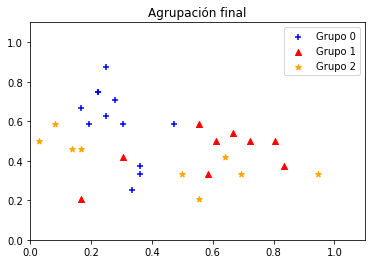

In [35]:
plot(x_prueba, y_prueba_EM, 3)

# Clases o grupos reales

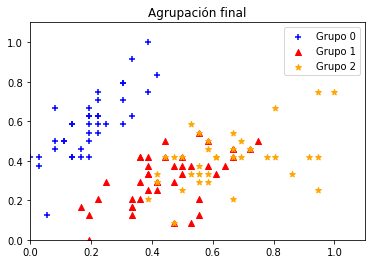

In [36]:
plot(x_entrenamiento, y_entrenamiento, 3)

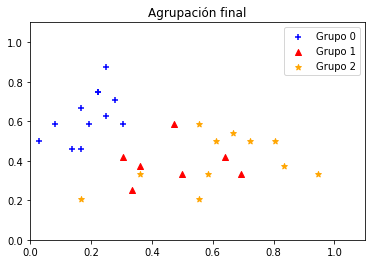

In [38]:
plot(x_prueba, y_prueba, 3)